## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 256)               6579

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [0.00001,0.0001,0.001,0.01,0.1]
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.3

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    """
    作業：請比較 SGD optimizer 不同的 momentum 
    及使用 nesterov 與否的表現 
    """
  
    # 這裡嘗試   optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=0.3)
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    
    # compile
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.000010
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer6 (Dense)        

Epoch 46/100
50000/50000 [==============================] - 6s 115us/step - loss: 2.2986 - accuracy: 0.1128 - val_loss: 2.2988 - val_accuracy: 0.1148
Epoch 47/100
50000/50000 [==============================] - 6s 112us/step - loss: 2.2984 - accuracy: 0.1129 - val_loss: 2.2986 - val_accuracy: 0.1146
Epoch 48/100
50000/50000 [==============================] - 6s 118us/step - loss: 2.2982 - accuracy: 0.1130 - val_loss: 2.2983 - val_accuracy: 0.1148
Epoch 49/100
50000/50000 [==============================] - 6s 117us/step - loss: 2.2980 - accuracy: 0.1131 - val_loss: 2.2981 - val_accuracy: 0.1146
Epoch 50/100
50000/50000 [==============================] - 6s 113us/step - loss: 2.2978 - accuracy: 0.1133 - val_loss: 2.2979 - val_accuracy: 0.1141
Epoch 51/100
50000/50000 [==============================] - 6s 113us/step - loss: 2.2975 - accuracy: 0.1135 - val_loss: 2.2977 - val_accuracy: 0.1137
Epoch 52/100
50000/50000 [==============================] - 6s 111us/step - loss: 2.2973 - accuracy:

50000/50000 [==============================] - 6s 121us/step - loss: 2.2884 - accuracy: 0.1398 - val_loss: 2.2886 - val_accuracy: 0.1403
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)   

50000/50000 [==============================] - 6s 129us/step - loss: 2.1807 - accuracy: 0.2219 - val_loss: 2.1779 - val_accuracy: 0.2251
Epoch 45/100
50000/50000 [==============================] - 6s 127us/step - loss: 2.1764 - accuracy: 0.2237 - val_loss: 2.1736 - val_accuracy: 0.2282
Epoch 46/100
50000/50000 [==============================] - 6s 127us/step - loss: 2.1721 - accuracy: 0.2251 - val_loss: 2.1693 - val_accuracy: 0.2292
Epoch 47/100
50000/50000 [==============================] - 6s 125us/step - loss: 2.1677 - accuracy: 0.2266 - val_loss: 2.1648 - val_accuracy: 0.2308
Epoch 48/100
50000/50000 [==============================] - 6s 122us/step - loss: 2.1633 - accuracy: 0.2287 - val_loss: 2.1604 - val_accuracy: 0.2323
Epoch 49/100
50000/50000 [==============================] - 6s 121us/step - loss: 2.1588 - accuracy: 0.2309 - val_loss: 2.1559 - val_accuracy: 0.2336
Epoch 50/100
50000/50000 [==============================] - 6s 127us/step - loss: 2.1543 - accuracy: 0.2317 - val

50000/50000 [==============================] - 7s 132us/step - loss: 1.9922 - accuracy: 0.2822 - val_loss: 1.9912 - val_accuracy: 0.2833
Epoch 99/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.9900 - accuracy: 0.2825 - val_loss: 1.9891 - val_accuracy: 0.2850
Epoch 100/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.9879 - accuracy: 0.2834 - val_loss: 1.9870 - val_accuracy: 0.2861
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 6s 120us/step - loss: 1.6634 - accuracy: 0.4091 - val_loss: 1.6643 - val_accuracy: 0.4132
Epoch 43/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.6574 - accuracy: 0.4122 - val_loss: 1.6547 - val_accuracy: 0.4141
Epoch 44/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.6515 - accuracy: 0.4121 - val_loss: 1.6543 - val_accuracy: 0.4135
Epoch 45/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.6462 - accuracy: 0.4160 - val_loss: 1.6517 - val_accuracy: 0.4136
Epoch 46/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.6403 - accuracy: 0.4178 - val_loss: 1.6528 - val_accuracy: 0.4107
Epoch 47/100
50000/50000 [==============================] - 6s 128us/step - loss: 1.6353 - accuracy: 0.4185 - val_loss: 1.6684 - val_accuracy: 0.4105
Epoch 48/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.6297 - accuracy: 0.4197 - val

50000/50000 [==============================] - 6s 117us/step - loss: 1.4445 - accuracy: 0.4850 - val_loss: 1.4995 - val_accuracy: 0.4663
Epoch 97/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.4397 - accuracy: 0.4880 - val_loss: 1.5044 - val_accuracy: 0.4634
Epoch 98/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.4366 - accuracy: 0.4880 - val_loss: 1.5022 - val_accuracy: 0.4674
Epoch 99/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.4341 - accuracy: 0.4882 - val_loss: 1.5113 - val_accuracy: 0.4633
Epoch 100/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.4318 - accuracy: 0.4895 - val_loss: 1.4770 - val_accuracy: 0.4764
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________

Epoch 41/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.1290 - accuracy: 0.5984 - val_loss: 1.3662 - val_accuracy: 0.5139
Epoch 42/100
50000/50000 [==============================] - 7s 133us/step - loss: 1.1214 - accuracy: 0.6026 - val_loss: 1.4178 - val_accuracy: 0.5095
Epoch 43/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.1074 - accuracy: 0.6059 - val_loss: 1.3961 - val_accuracy: 0.5150
Epoch 44/100
50000/50000 [==============================] - 6s 120us/step - loss: 1.0962 - accuracy: 0.6101 - val_loss: 1.4432 - val_accuracy: 0.4981
Epoch 45/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.0872 - accuracy: 0.6146 - val_loss: 1.5417 - val_accuracy: 0.4849
Epoch 46/100
50000/50000 [==============================] - 6s 118us/step - loss: 1.0663 - accuracy: 0.6221 - val_loss: 1.3955 - val_accuracy: 0.5151
Epoch 47/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.0732 - accuracy:

50000/50000 [==============================] - 6s 126us/step - loss: 0.5777 - accuracy: 0.7976 - val_loss: 1.7633 - val_accuracy: 0.5282
Epoch 96/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.5397 - accuracy: 0.8100 - val_loss: 2.2026 - val_accuracy: 0.4933
Epoch 97/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.5559 - accuracy: 0.8046 - val_loss: 2.2596 - val_accuracy: 0.4254
Epoch 98/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.5484 - accuracy: 0.8080 - val_loss: 1.8602 - val_accuracy: 0.4912
Epoch 99/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.5283 - accuracy: 0.8127 - val_loss: 2.1631 - val_accuracy: 0.4499
Epoch 100/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.5418 - accuracy: 0.8095 - val_loss: 2.3550 - val_accuracy: 0.4498
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________

Epoch 40/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.7543 - accuracy: 0.7291 - val_loss: 1.7615 - val_accuracy: 0.4823
Epoch 41/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.7356 - accuracy: 0.7364 - val_loss: 2.0870 - val_accuracy: 0.3881
Epoch 42/100
50000/50000 [==============================] - 6s 115us/step - loss: 0.7278 - accuracy: 0.7400 - val_loss: 1.7465 - val_accuracy: 0.4994
Epoch 43/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.6820 - accuracy: 0.7551 - val_loss: 1.9842 - val_accuracy: 0.4443
Epoch 44/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.6898 - accuracy: 0.7533 - val_loss: 2.2306 - val_accuracy: 0.4139
Epoch 45/100
50000/50000 [==============================] - 6s 112us/step - loss: 0.6543 - accuracy: 0.7643 - val_loss: 1.8748 - val_accuracy: 0.4902
Epoch 46/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.6383 - accuracy:

50000/50000 [==============================] - 5s 109us/step - loss: 0.1754 - accuracy: 0.9399 - val_loss: 3.4283 - val_accuracy: 0.5091
Epoch 95/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.1416 - accuracy: 0.9512 - val_loss: 3.9512 - val_accuracy: 0.4688
Epoch 96/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.1688 - accuracy: 0.9428 - val_loss: 3.3840 - val_accuracy: 0.5066
Epoch 97/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.1320 - accuracy: 0.9547 - val_loss: 3.4684 - val_accuracy: 0.4981
Epoch 98/100
50000/50000 [==============================] - 5s 107us/step - loss: 0.1734 - accuracy: 0.9402 - val_loss: 3.4265 - val_accuracy: 0.5009
Epoch 99/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.1354 - accuracy: 0.9535 - val_loss: 3.6985 - val_accuracy: 0.4865
Epoch 100/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.1306 - accuracy: 0.9553 - va

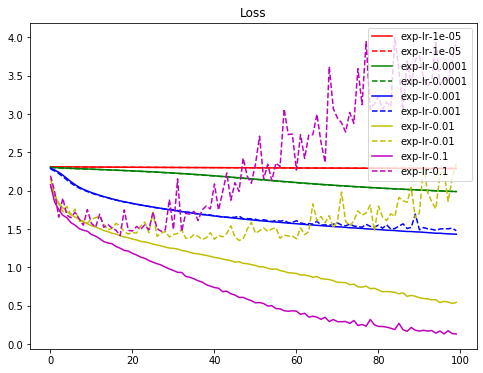

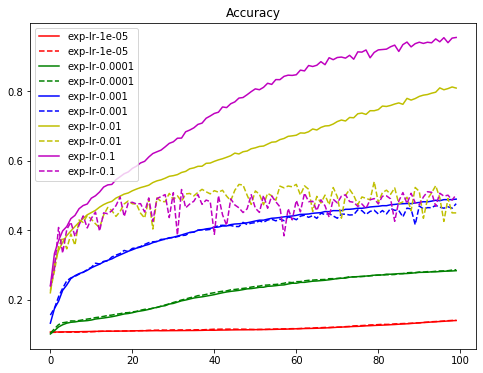

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()